# GLMを通してNNを理解する

一般にNeural Network Model(以下NN)はGeneralized Linear Model(以下GLM)の文脈で学ばれます。GLMの多出力・多層モデルがNNと同値関係あるからです。

まずは重回帰の線形回帰モデルをバッチ学習ができるように組んでみましょう。

### 重回帰

\begin{align}
    仮定関数：\hat{y} &= XW  \\
    \\
    \hat{y} = 
        \begin{bmatrix}
            \hat{y_1} \\
            \hat{y_2} \\
            \vdots \\
            \hat{y_n}
        \end{bmatrix},
    W &= 
        \begin{bmatrix}
            w_1 \\
            w_2 \\
            \vdots \\
            w_d
        \end{bmatrix},
    X = 
        \begin{bmatrix}
            x_{01} && x_{11} && \cdots && x_{d1} \\
            x_{02} && x_{12} && \cdots && x_{d2} \\
            \vdots && \vdots && \ddots && \vdots \\
            x_{0n} && x_{1n} && \cdots && x_{dn}
        \end{bmatrix} \\
        \\
    評価関数:J&=\frac{1}{2}||y-\hat{y}||^2 \\
    \frac{\partial J}{\partial w} &= -X^T(y-\hat{y})
    \\
    w_{new} &= w_{old} - \alpha \frac{\partial J}{\partial w}  \\
            &= w_{old} + \alpha X^T(y-\hat{y})
\end{align}

In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
class LinearRegression:
    def __init__(self):
        pass
    
    def optimize(self,X,y):
        #print(self.w.shape)
        #print(X,self.w)
        self.w += self.lr * np.dot(X.T,(y-np.dot(X,self.w)))/self.batch_size
    
    def fit(self, X, y, lr=0.01, epoch=100, batch_size=10):
        self.lr = lr
        self.w = np.zeros((X.shape[1],1))
        self.batch_size = batch_size
        n_sample = len(y)
        y = y.reshape(n_sample,1)
        
        for i in range(epoch):
            for j in range(int(len(y)/batch_size)):
                X_mini, y_mini = X[i*batch_size:(j+1)*batch_size,:], y[i*batch_size:(j+1)*batch_size]
                self.optimize(X_mini,y_mini)
            
    def predict(self,X):
        y = np.dot(X,self.w)
        return y

### トイデータ作成

In [114]:
X = np.array([[1,3,-6]]) + np.random.randn(100,3)
y = (np.dot(X,np.array([[1],[3],[-6]])) + np.random.randn(100,1)).reshape(-1)

In [116]:
SGD = LinearRegression()
SGD.fit(X,y,epoch=500)
y_pred = SGD.predict(X)

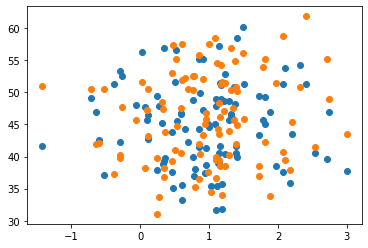

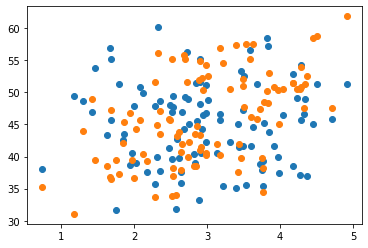

[[ 1.09243145]
 [ 2.92429064]
 [-6.03125126]]


In [115]:
plt.scatter(X[:,0],y_pred)
plt.scatter(X[:,0],y)
plt.show()
plt.scatter(X[:,1],y_pred)
plt.scatter(X[:,1],y)
plt.show()
print(SGD.w)